Load the data

In [29]:
import pandas as pd

data = pd.read_csv('../data/heart_2020_cleaned.csv')

Normalize variables

In [30]:
from sklearn.preprocessing import MinMaxScaler

columns_to_normalize = data.select_dtypes(include=['float64']).columns
scaler = MinMaxScaler()
data[columns_to_normalize] = scaler.fit_transform(data[columns_to_normalize])

Separate between objective and independent variables

In [31]:
char = data.drop(columns=['HeartDisease'])
obj = data['HeartDisease']

Applicating Mutual Information

In [32]:
from sklearn.feature_selection import SelectKBest, f_classif
 
selector = SelectKBest(score_func=f_classif, k=2)
char_new = selector.fit_transform(char, obj)
selected_features_indices = selector.get_support(indices=True)
selected_features = char.columns[selected_features_indices]
print("Selected Features:", selected_features)

Selected Features: Index(['AgeCategory', 'GenHealth'], dtype='object')


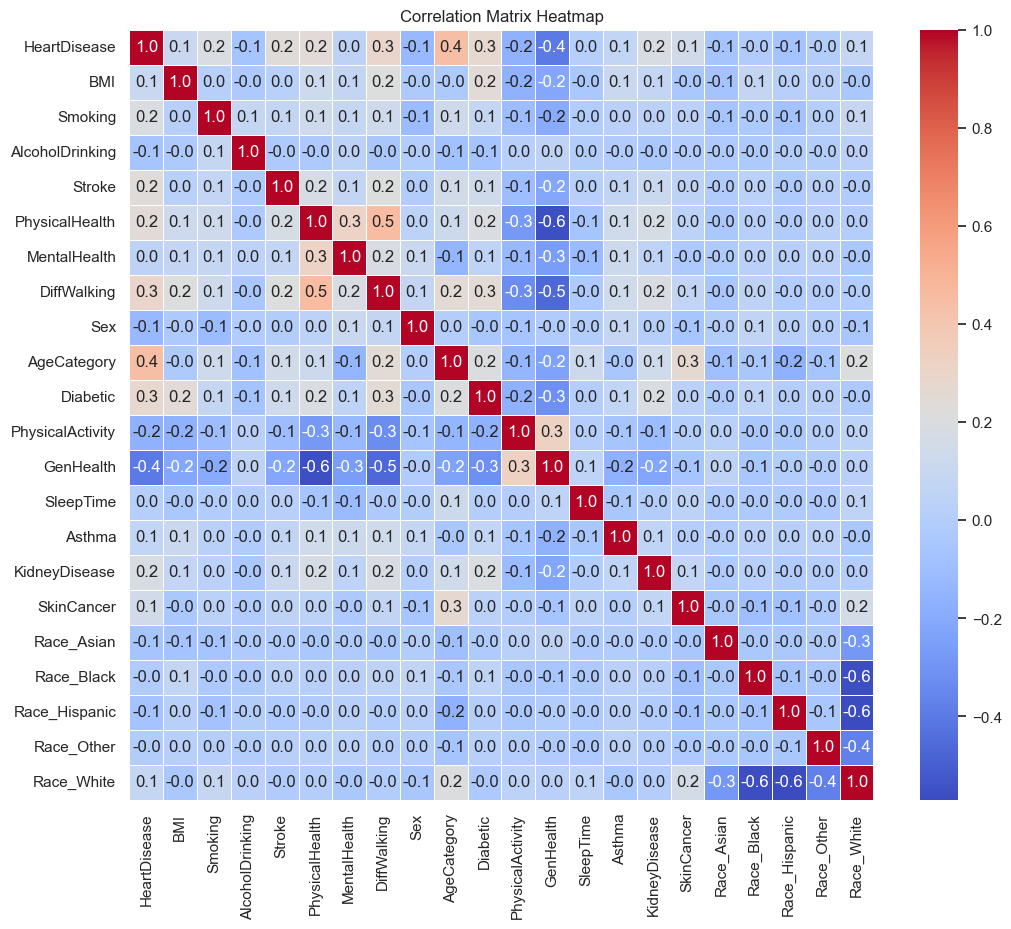

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = data.corr()

plt.figure(figsize=(12, 10))
sns.set(font_scale=1.0)

sns.heatmap(correlation_matrix, annot=True, fmt=".1f", cmap='coolwarm', linewidths=0.5)

plt.title('Correlation Matrix Heatmap')
plt.show()

Divide between test and train data

In [34]:
from sklearn.model_selection import train_test_split

char_train, char_test, obj_train, obj_test = train_test_split(char_new, obj, test_size=0.2, random_state=42)

In [35]:
from sklearn.neighbors import KNeighborsClassifier

k = 19
knn_model = KNeighborsClassifier(n_neighbors=k)

# Training of the model
knn_model.fit(char_train, obj_train)

# Evaluation of the model
predictions = knn_model.predict(char_test)


from sklearn.metrics import accuracy_score, recall_score, f1_score

accuracy = accuracy_score(obj_test, predictions)
recall = recall_score(obj_test, predictions)
f1 = f1_score(obj_test, predictions)

print(f'Accuracy: {accuracy:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}')

Accuracy: 0.74
Recall: 0.85
F1-Score: 0.77


In [36]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(knn_model, char_new, obj, cv=5, scoring='accuracy')

mean_score = scores.mean()
std_score = scores.std()

print(f'Accuracy Mean: {mean_score:.2f}')
print(f'Accuracy Std: {std_score:.2f}')

Accuracy Mean: 0.74
Accuracy Std: 0.01
